In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Data Exploration and Cleansing

- Inspected the first 5 rows in the dataset
- Checked the data type for all fields 
- Verified that there were no missing values 
- Converted the GDP field into billions
- Used boxplots to check the distribution of Life Expectancy and GDP data and verify that there are no outliers

In [22]:
df = pd.read_csv('all_data.csv')
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [24]:
df.dtypes

Country                              object
Year                                  int64
Life expectancy at birth (years)    float64
GDP                                 float64
dtype: object

In [25]:
df.isna().sum()

Country                             0
Year                                0
Life expectancy at birth (years)    0
GDP                                 0
dtype: int64

In [38]:
# rename column
df.rename(columns={'Life expectancy at birth (years)': 'Life Expectancy'}, inplace=True)
df.head()

,Country,Year,Life Expectancy,GDP
0,Chile,2000,77.3,77.860932
1,Chile,2001,77.3,70.979924
2,Chile,2002,77.8,69.736811
3,Chile,2003,77.9,75.643460
4,Chile,2004,78.0,99.210393


In [23]:
# divide by 1 bn
df['GDP'] = df['GDP'] / 1_000_000_000
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,77.860932
1,Chile,2001,77.3,70.979924
2,Chile,2002,77.8,69.736811
3,Chile,2003,77.9,75.643460
4,Chile,2004,78.0,99.210393


In [31]:
max_yr = df.groupby('Country').Year.max()
min_yr = df.groupby('Country').Year.min()
print(max_yr, min_yr)

Country
Chile                       2015
China                       2015
Germany                     2015
Mexico                      2015
United States of America    2015
Zimbabwe                    2015
Name: Year, dtype: int64 Country
Chile                       2000
China                       2000
Germany                     2000
Mexico                      2000
United States of America    2000
Zimbabwe                    2000
Name: Year, dtype: int64


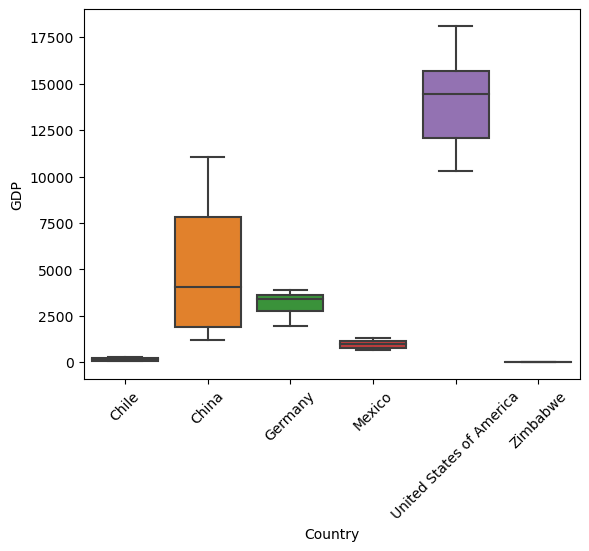

In [36]:
sns.boxplot(
    data=df,
    x='Country',
    y='GDP'
)
plt.xticks(rotation=45)
plt.show()

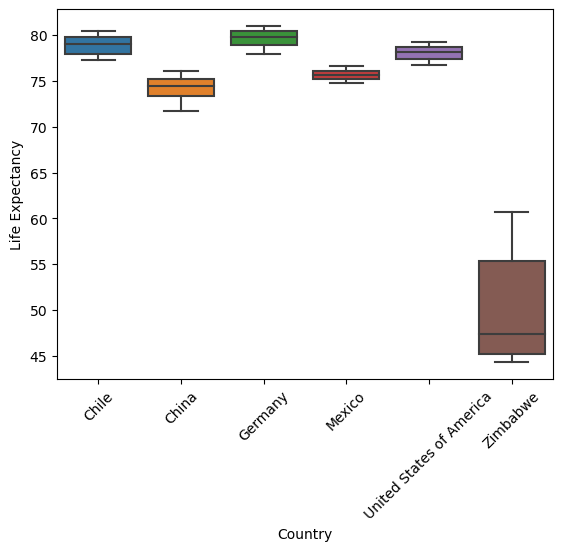

In [39]:
sns.boxplot(
    data=df,
    x='Country',
    y='Life Expectancy'
)
plt.xticks(rotation=45)
plt.show()

The box plots for GDP and Life Expectancy confirm that there are no outliers. The followings observations stand out:
- China and USA have a wider distribution of GDP across the time period than the other countries. The distribution for China is skewed
- For Life Expectancy, Zimbabwe has a much wider distribution and it is also skewed

The reason for this is that these countries have experienced GDP and Life Expectancy growth respectively over the time period. USA has experienced steady GDP growth over the period, which explains why the distribution is fairly symmetrical. The skewed distributions for China's GDP and Zimbabwe's Life Expectancy can be explained as follows:
- China's GDP has been growing exponentially within the time period
- Zimbabwe's Life Expectancy increases only began within the last decade of the data

On the other hand, the USA has experienced steady GDP growth across the period.

Please refer to the charts in the Trends section to see evidence of this.

## 2015 Snapshot

Germany has the highest life expectancy at birth of 81.0 years. Zimbabwe has the lowest life expectancy of 60.7 years,over 15 years fewer than the next lowest country.

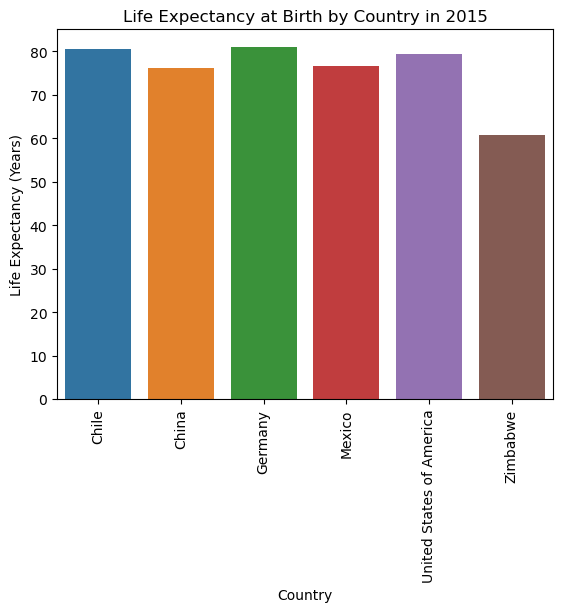

In [61]:
sns.barplot(x='Country', y='Life Expectancy', data = df[df.Year == 2015])
plt.xlabel('Country')
plt.ylabel('Life Expectancy (Years)')
plt.title('Life Expectancy at Birth by Country in 2015')
plt.xticks(rotation=90)
plt.show()

In [70]:
df[df.Year == 2015][['Country', 'Life Expectancy']].sort_values(by='Life Expectancy', ascending=False).reset_index()

,index,Country,Life Expectancy
0,47,Germany,81.0
1,15,Chile,80.5
2,79,United States of America,79.3
3,63,Mexico,76.7
4,31,China,76.1
5,95,Zimbabwe,60.7


USA has the highest GDP, followed by China. Zimbabwe and Chile have very small GDP compared to the other countries.

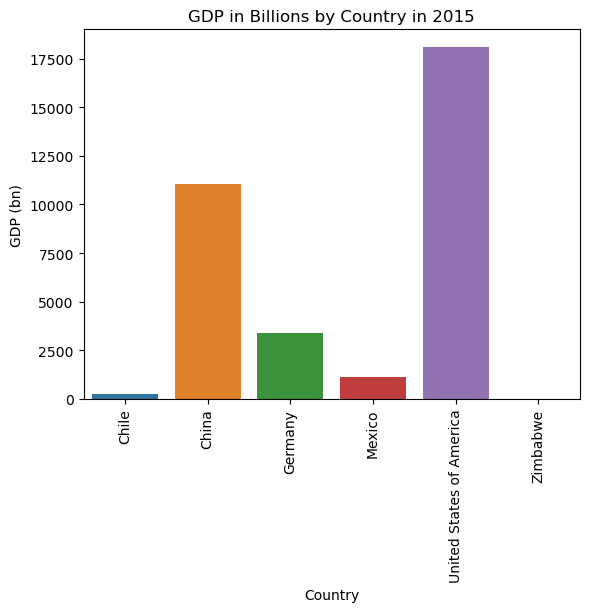

In [76]:
sns.barplot(x='Country', y='GDP', data = df[df.Year == 2015])
plt.xlabel('Country')
plt.ylabel('GDP (bn)')
plt.title('GDP in Billions by Country in 2015')
plt.xticks(rotation=90)
plt.ylim(0, None)
plt.show()

In [77]:
df[df.Year == 2015][['Country', 'GDP']].sort_values(by='GDP', ascending=False).reset_index()

,index,Country,GDP
0,79,United States of America,18100.000000
1,31,China,11064.700000
2,47,Germany,3375.610000
3,63,Mexico,1152.260000
4,15,Chile,242.518000
5,95,Zimbabwe,16.304668


As made clear by the below scatter plot, there is no clear relationship between Life Expectancy and GDP. This is likely because Life Expectancy relates to quality of life, which is better measured by GDP per capita rather than GDP.

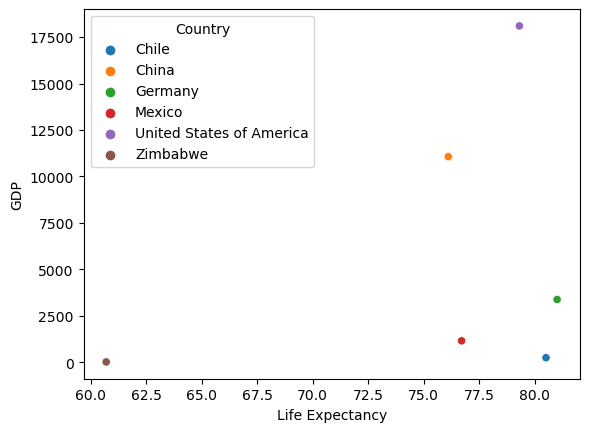

In [93]:
sns.scatterplot(x='Life Expectancy', y='GDP', hue='Country', data=df[df.Year == 2015])
plt.show()

## Trends

In [89]:
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')



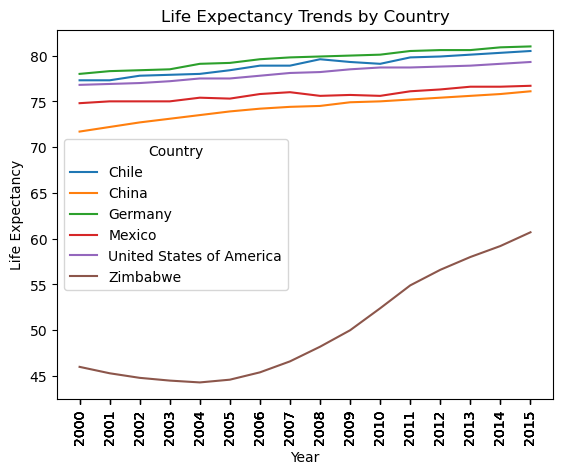

In [90]:
sns.lineplot(x='Year', y='Life Expectancy', hue='Country', data=df)
plt.title('Life Expectancy Trends by Country')
plt.xticks(df.Year, rotation=90)
plt.show()

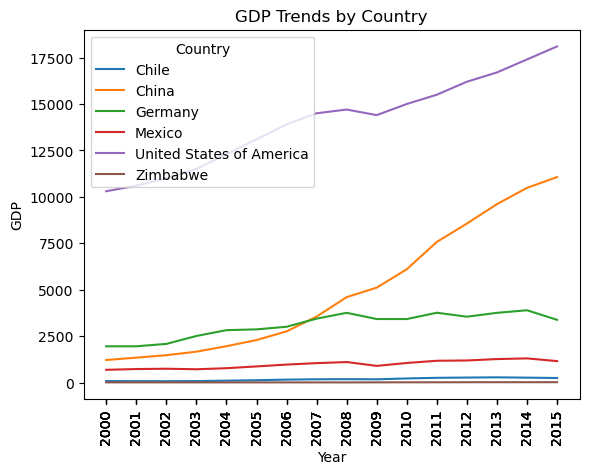

In [91]:
sns.lineplot(x='Year', y='GDP', hue='Country', data=df)
plt.title('GDP Trends by Country')
plt.xticks(df.Year, rotation=90)
plt.show()

## GDP vs Life Expectancy

While GDP is not a reliable predictor of life expectancy, scatter plots of GDP vs life expectancy for each country show a positive relationship between the two. This suggests that economic growth is associated with increasing life expectancy.

For 5 countries out of 6 this relationship was fairly weak, however for Zimbabwe the relationship was much stronger. This is to be expected, as Zimbabwe has the lowest GDP and life expectancy so the marginal impact of GDP growth on life expectancy are expected to be greater.

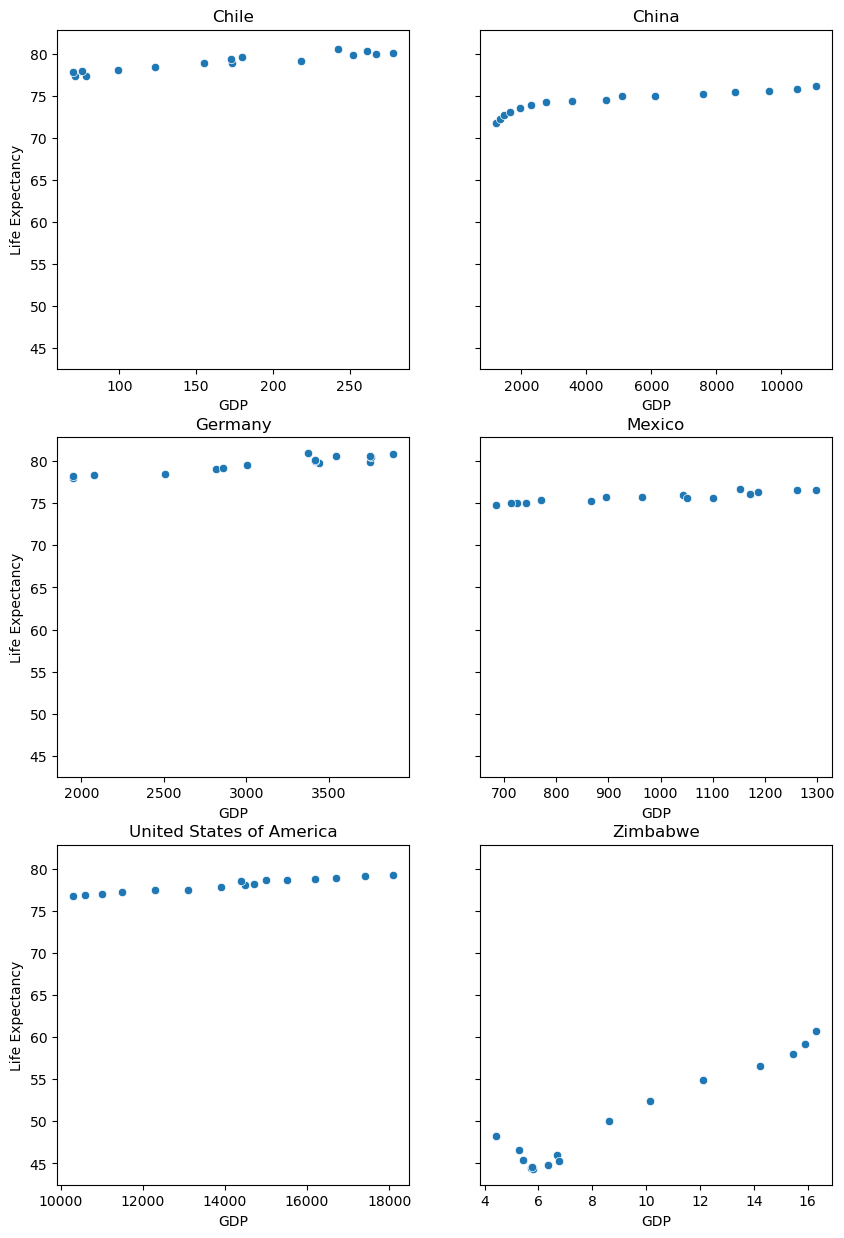

In [112]:
# Get unique countries
countries = df['Country'].unique()

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(10, 15), sharey=True)

axes = axes.flatten()

# Create a scatter plot for each country
for i, country in enumerate(countries):
    sns.scatterplot(x='GDP', y='Life Expectancy', data=df[df['Country'] == country], ax=axes[i])
    axes[i].set_title(f'{country}')
    axes[i].set_xlabel('GDP')
    if i == 0:
        axes[i].set_ylabel('Life Expectancy')


# Display the plot
plt.show()


## Conclusions

In 2015:
- USA had the largest GDP of any country in the dataset, followed by China
- Germany had the highest life expectancy
- Zimbabwe had the lowest GDP and the lowest life expectancy by 15 years

Across the time period (2000-2015):
- USA and China have experienced significantly higher economic growth than the other countries
- USA has experienced steady economic growth 
- China's economic growth accelerated from around 2005 onwards
- Zimbabwe's life expectancy at birth fell in the early 2000s and has risen sharply since
- All of the other countries have experienced more gradual life expectancy increases

On the relationship between GDP and life expectancy:
- Overall, GDP is a poor predictor of life expectancy - GDP per capita would be more helpful
- In all of the countries, there is a positive relationship between GDP and life expectancy (although this does not necessarily mean causation)
- This relationship is strongest in Zimbabwe, the least developed country in the dataset